In [2]:
import numpy as np
import os, sys
import pandas as pd

In [10]:
data = pd.read_csv(os.path.expandvars('$LSST_DATA')+'mike_proj/catalog.csv',delimiter=';')

In [34]:
data

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, K�ln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",http://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, K�ln, d. 1615, Praha)","Bacchus, Ceres and Cupid",-,"Oil on canvas, 163 x 113 cm","Kunsthistorisches Museum, Vienna",http://www.wga.hu/html/a/aachen/bacchus.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, K�ln, d. 1615, Praha)",Joking Couple,-,"Copperplate, 25 x 20 cm","Kunsthistorisches Museum, Vienna",http://www.wga.hu/html/a/aachen/j_couple.html,painting,genre,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, K�ln, d. 1615, Praha)",Portrait of Emperor Rudolf II,1590s,"Oil on canvas, 60 x 48 cm","Kunsthistorisches Museum, Vienna",http://www.wga.hu/html/a/aachen/rudolf2.html,painting,portrait,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, K�ln, d. 1615, Praha)",Self-Portrait with a Glass of Wine,c. 1596,"Oil on canvas, 53 x 44 cm",Private collection,http://www.wga.hu/html/a/aachen/selfport.html,painting,portrait,German,1601-1650
5,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, K?benhavn)",Deer beside a Lake,1888,"Oil on canvas, 53 x 82 cm",Private collection,http://www.wga.hu/html/a/aagaard/deerlake.html,painting,landscape,Danish,1851-1900
6,"AAGAARD, Carl Frederik","(b. 1833, Odense, d. 1895, K?benhavn)",The Rose Garden,1877,"Oil on canvas, 98 x 80 cm",Private collection,http://www.wga.hu/html/a/aagaard/rosegard.html,painting,landscape,Danish,1851-1900
7,"ABADIA, Juan de la",(active 1470-1490 in Huesca),The Archangel Michael,c. 1490,"Wood, 127 x 78 cm","Museu Nacional d'Art de Catalunya, Barcelona",http://www.wga.hu/html/a/abadia/michael.html,painting,religious,Spanish,1451-1500
8,"ABAQUESNE, Mass�ot","(b. ca 1500, Cherbourg, d. 1564, Sotteville-l?...",Albarello,c. 1545,Maiolica,"Mus�e des Beaux-Arts, Rouen",http://www.wga.hu/html/a/abaquesn/albarell.html,ceramics,other,French,1501-1550
9,"ABAQUESNE, Mass�ot","(b. ca 1500, Cherbourg, d. 1564, Sotteville-l?...",Ceramic Floor,1542,Ceramics,"Mus�e National de la Renaissance, �couen",http://www.wga.hu/html/a/abaquesn/floor1.html,ceramics,other,French,1501-1550


In [11]:
subset = data[(data['AUTHOR'] == 'MICHELANGELO Buonarroti') | (data['AUTHOR'] == 'MONET, Claude') | (data['AUTHOR'] == 'GOGH, Vincent van') ]
len(subset)

1201

In [12]:
%matplotlib inline
from PIL import Image, ImageOps, ImageFilter
import matplotlib.pyplot as plt
img_size = 128
n_images = len(subset)
image_mat = np.zeros((n_images,3,img_size,img_size),dtype='uint8')
class_vec = np.zeros(n_images) #
image_dir = '/nfs/slac/g/ki/ki19/lsst/mbaumer/mike_proj/wga/'
author_list = data.AUTHOR
for i in range(n_images):
    if i % 10 == 0 : print i
    if author_list[subset.index[i]] == 'MICHELANGELO Buonarroti':
        class_vec[i] = 0
    elif author_list[subset.index[i]] == 'MONET, Claude':
        class_vec[i] = 1
    elif author_list[subset.index[i]] == 'GOGH, Vincent van':
        class_vec[i] = 2
    temp = Image.open(image_dir+str(subset.index[i])+'.jpg')
    #print temp.size
    thumb = ImageOps.fit(temp, (img_size,img_size))
    arr = np.asarray(thumb,dtype='uint8')
    if thumb.mode == 'L': 
        print 'image ', i, 'is BW'
        data = np.array([arr,arr,arr])
    else:
        data = np.transpose(arr.reshape(img_size,img_size,3),(2,0,1))
    image_mat[i,:,:,:] = data

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
image  339 is BW
340
image  345 is BW
350
360
image  369 is BW
370
image  371 is BW
image  376 is BW
380
image  383 is BW
image  384 is BW
390
image  394 is BW
400
410
420
430
440
image  447 is BW
450
460
470
480
490
image  496 is BW
500
510
520
530
540
550
560
image  566 is BW
570
580
590
600
610
620
630
640
650
660
670
680
image  685 is BW
690
700
710
720
730
740
750
image  750 is BW
image  751 is BW
image  752 is BW
760
770
780
790
800
810
820
image  823 is BW
830
840
image  842 is BW
850
image  855 is BW
860
870
image  878 is BW
image  879 is BW
880
image  884 is BW
890
image  892 is BW
900
910
image  911 is BW
920
image  920 is BW
930
image  936 is BW
940
950
960
970
980
image  984 is BW
image  985 is BW
990
image  991 is BW
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200


In [13]:
from sklearn.cross_validation import train_test_split
print np.sum(class_vec == 0), np.sum(class_vec == 1), np.sum(class_vec == 2)
X_train, X_test, y_train, y_test = train_test_split(image_mat, class_vec, test_size=0.2, random_state=42)

587 196 418


In [14]:
outdict = {}
outdict['X_train'] = X_train
outdict['X_test'] = X_test
outdict['y_train'] = y_train
outdict['y_test'] = y_test
print outdict.keys()

['X_test', 'X_train', 'y_train', 'y_test']


In [16]:
np.save('X.npy',image_mat)

In [17]:
np.save('Y.npy',class_vec)

In [15]:
outdict['X_train'].shape

(960, 3, 128, 128)

In [ ]:
import pickle
pickle.dump(outdict, open( "data_3artists.pickle", "wb" ) )

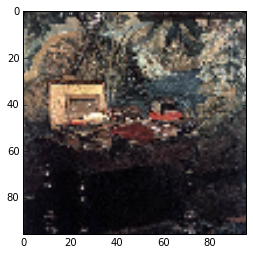

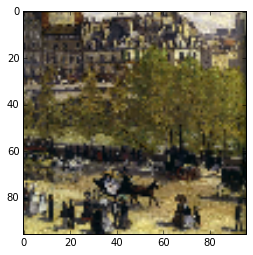

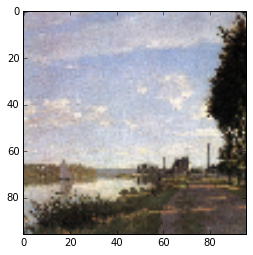

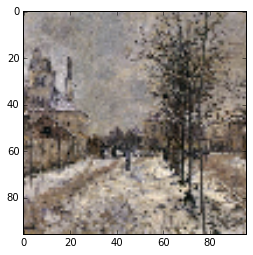

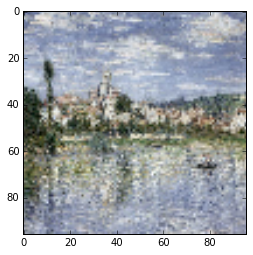

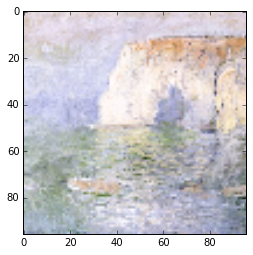

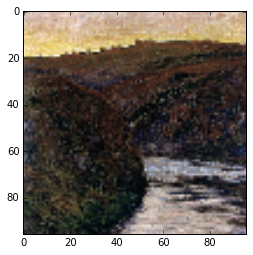

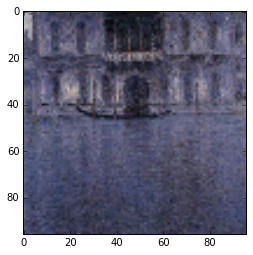

In [30]:
#arr = image_mat[1,:,:,:]
def viewImage(arr):
    arr = arr.astype('uint8')
    arr = np.transpose(arr,(1,2,0))
    temp = Image.fromarray(arr)
    plt.imshow(arr)
for i in np.arange(1005,1200,25):
    plt.figure()
    viewImage(image_mat[i,:,:,:])

In [26]:
data['TITLE'][subset.index[900]]

'Studies of Two Male Torsi and a Right Leg'

##Code to get files from WGA

In [32]:
%%writefile ../code/download_wga.py
for i in range(10):
    print 'downloading image ', i
    this_img_url = data['URL'][i]
    parts = this_img_url.split('html')
    this_img_url = parts[0]+'art'+parts[1]+'jpg'
    destination = '/nfs/slac/g/ki/ki19/lsst/mbaumer/mike_proj/wga/'
    command = 'wget '+this_img_url+' -O '+destination+str(i)+'.jpg'
    print command
    os.system(command)

Writing ../code/download_wga.py


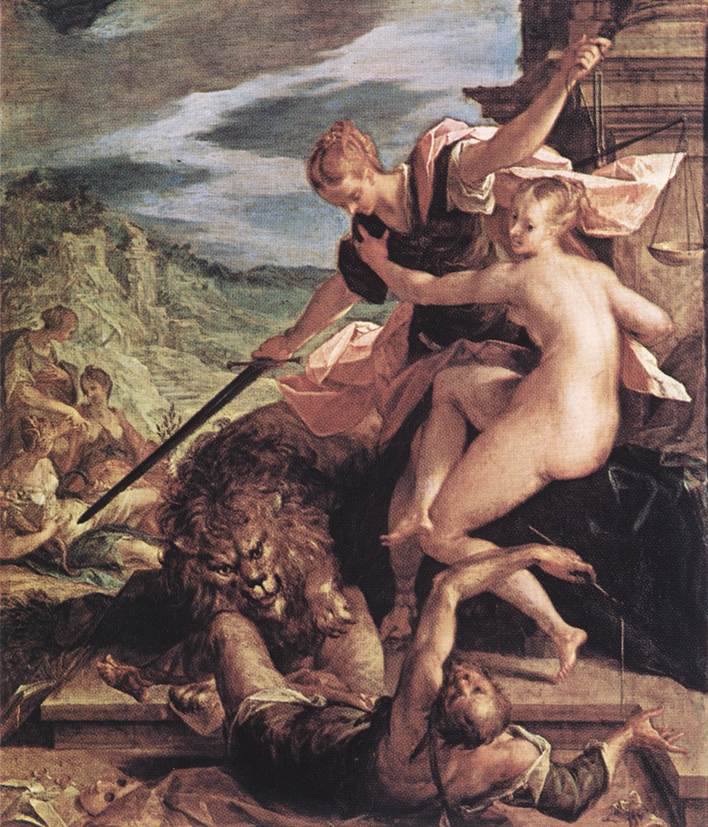

In [25]:
%matplotlib inline
from PIL import Image
image = Image.open(destination+'0.jpg')
image

In [30]:
image.im.bands

3